<a href="https://colab.research.google.com/github/akshkalyani/Minor-Project/blob/master/leafdiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary files

In [12]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data Image

In [13]:
path_folder = "/content/drive/My Drive/test"
class_name = os.listdir(path_folder)
class_name.sort()
#class_name = class_name[:4] + class_name[20:23]

class_name = class_name[4:11]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))

        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
Loading Folder -- Tomato___Early_blight  The Count of Classes ==>  0
Loading Folder -- Tomato___Late_blight  The Count of Classes ==>  1
Loading Folder -- Tomato___Leaf_Mold  The Count of Classes ==>  2
Loading Folder -- Tomato___Septoria_leaf_spot  The Count of Classes ==>  3
Loading Folder -- Tomato___Spider_mites Two-spotted_spider_mite  The Count of Classes ==>  4
Loading Folder -- Tomato___Target_Spot  The Count of Classes ==>  5
Loading Folder -- Tomato___Tomato_Yellow_Leaf_Curl_Virus  The Count of Classes ==>  6
---- Done ----------- 


# Preprocessing and data visualisation

In [14]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [15]:
print(data.shape)

(8757, 100, 100, 3)


# Transform Label To One Hot Encoder

In [16]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Shuffle Data

In [17]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7005, 100, 100, 3), (7005, 7), (1752, 100, 100, 3), (1752, 7))

# Visualize Data

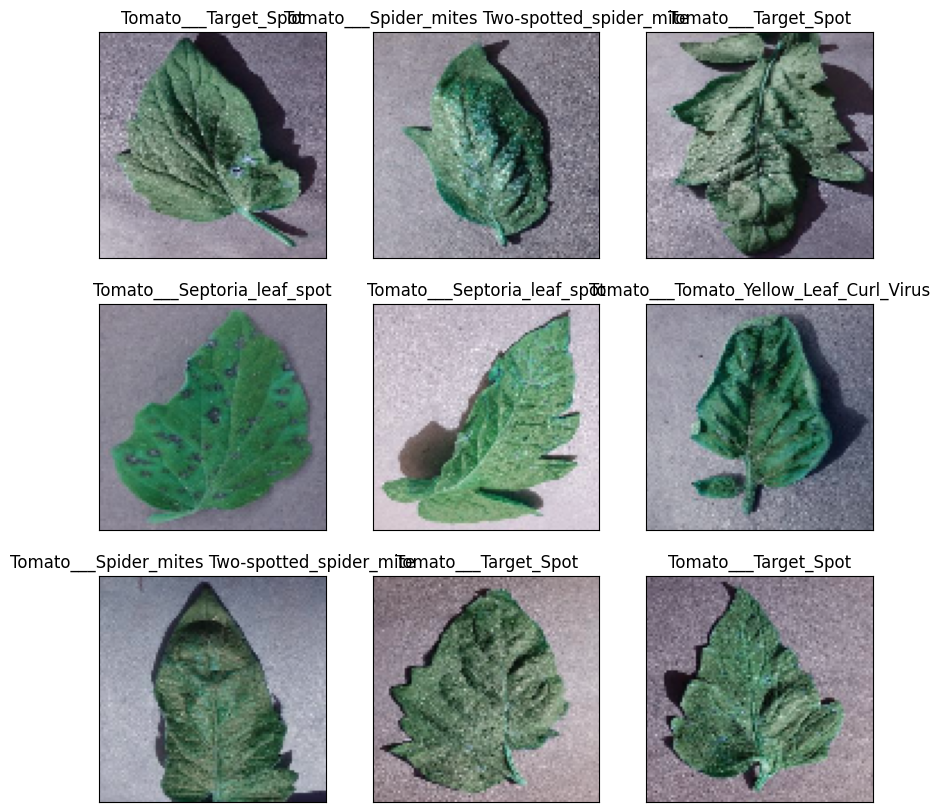

In [19]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

# Building CNN Model

In [20]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(7, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d_3 (Avera  (None, 50, 50, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_4 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_5 (Avera  (None, 12, 12, 64)       

In [21]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/50
219/219 [==============================] - 99s 442ms/step - loss: 1.4584 - accuracy: 0.3529 - val_loss: 0.9036 - val_accuracy: 0.6758
Epoch 2/50
219/219 [==============================] - 100s 455ms/step - loss: 0.9079 - accuracy: 0.6410 - val_loss: 0.5837 - val_accuracy: 0.7774
Epoch 3/50
219/219 [==============================] - 111s 505ms/step - loss: 0.7181 - accuracy: 0.7299 - val_loss: 0.4888 - val_accuracy: 0.8305
Epoch 4/50
219/219 [==============================] - 107s 489ms/step - loss: 0.6011 - accuracy: 0.7749 - val_loss: 0.4189 - val_accuracy: 0.8413
Epoch 5/50
219/219 [==============================] - 99s 451ms/step - loss: 0.5061 - accuracy: 0.8063 - val_loss: 0.3710 - val_accuracy: 0.8676
Epoch 6/50
219/219 [==============================] - 101s 458ms/step - loss: 0.4492 - accuracy: 0.8287 - val_loss: 0.2756 - val_accuracy: 0.9024
Epoch 7/50
219/219 [==============================] - 101s 462ms/step - loss: 0.4220 - accuracy: 0.8475 - val_loss: 0.3153 - v

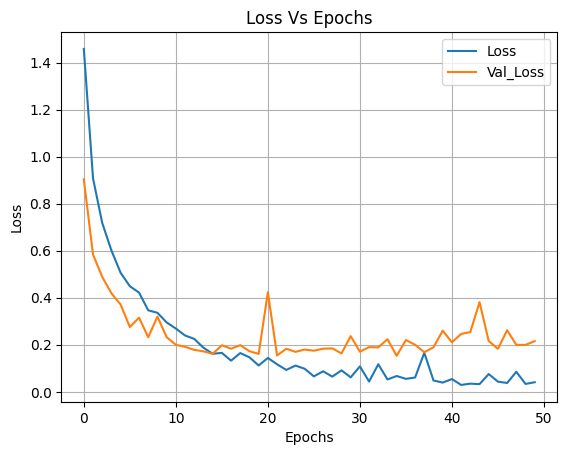

In [22]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

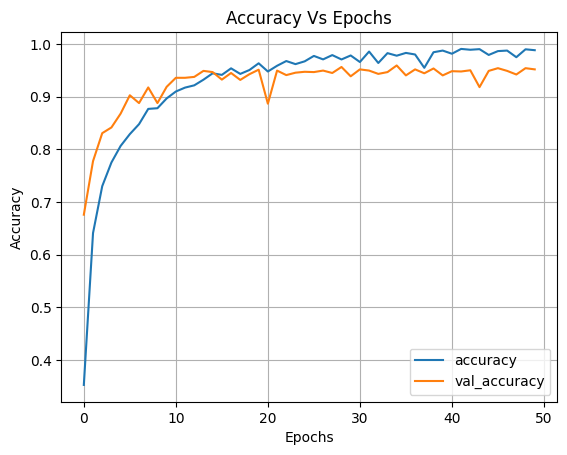

In [23]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

55/55 [==============================] - 7s 135ms/step - loss: 0.2156 - accuracy: 0.9515
The Accuracy Testing Data is ==> 0.9514840245246887 %
The loss Testing Data is ==> 0.21556216478347778


#System Prediction

In [27]:
path_img1 = input()
image = cv2.imread(path_img1)
image = cv2.resize(image, (224, 224))
# image = image/255.0
# print(image1.shape)
new_image = np.reshape(image, [1, 224, 224, 3])

# ================== Show Prediction =================================

prediction = model.predict(new_image)[0]
# print(prediction1)


new_prediction = class_name[np.argmax(prediction)]
# print("The Prediction is ==> ", new_prediction1)

print("Type Of Planet ==>", new_prediction[:new_prediction.index("__")])
print("Type Disease Of Planet ==>", new_prediction[new_prediction.index("__")+3:])

# ================== Show image And Label Prediction =================================

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()

/content/drive/My Drive/test/Tomato___Septoria_leaf_spot/0a68a294-30d1-4422-ab7e-a1909ec277f7___JR_Sept.L.S 8443


error: ignored

#Show Prediction

In [30]:
path_test = r"/content/drive/My Drive/test"
#"D:\Prototype-Green-Hackathon\testing"
image_testing = []
label_testing = []
for img in os.listdir(path_test):
    image = path_test + "\\" + img
    image = cv2.imread(image)
    new_image = cv2.resize(image, (224, 224))
    image_testing.append(new_image)
    label_testing.append(img[:-5])

image_testing = np.array(image_testing)
label_testing = np.array(label_testing)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(6, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    new_image = np.resize(image_testing[i], [1, 224, 224, 3])
    prediction = model.predict(new_image)
    prediction = prediction[0]
    print(prediction)
    plt.imshow(image_testing[i])
    plt.title(f"The Real Prediction is {label_testing[i]} \n The model Prediction is {class_name[np.argmax(prediction)]}")

error: ignored